# **Tarea DBSCAN**

En este cuaderno de Jupyter se desarrollarán 3 ejercicios con el método *DBSCAN* para el repositorio de tareas del curso Física Computacional 2:

1. Encuentrar el número de grupos con:

*   `eps=2`
*   `min_samples=10`

(No incluye ruido).

2. Usando el objeto 'DBSCAN' ajustado del ejercicio anterior, encuentrar el % de los datos que se marcaron como ruido

3. Usando `matplotlib.pyplot`, visualice los datos agrupados, donde cada grupo tiene su propio color asignado.

Todos estarán incluidos en un solo paquete de código.



In [101]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

import matplotlib.pyplot as plt

%matplotlib inline

# **Ejercicio**

**Base de datos**

In [102]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
df.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


**Visualización**

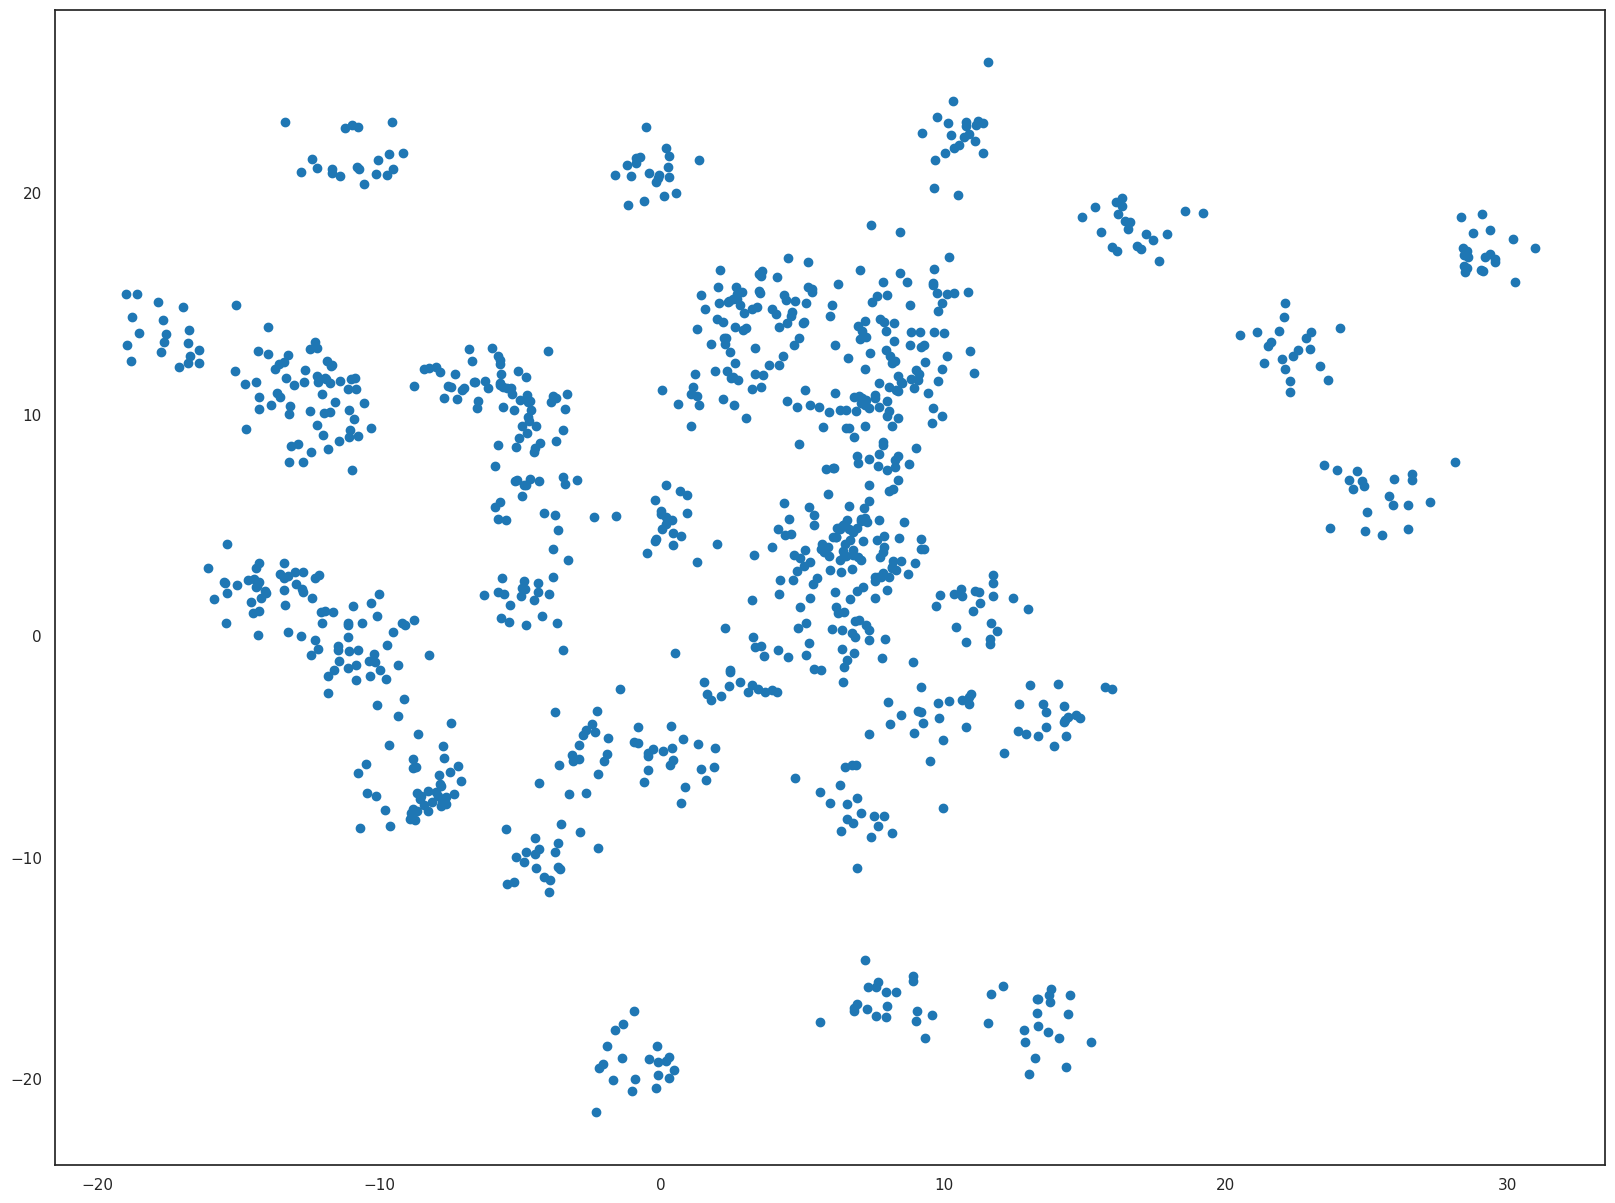

In [115]:
plt.rcParams['figure.figsize'] = (20,15)
plt.scatter(df['x'], df['y'])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

**Método DBSCAN**

In [104]:
cluster = DBSCAN(eps=2, min_samples=10)
cluster.fit(df)
display(f'DBSCAN encontró {len(set(cluster.labels_) - set([-1]))} clusters y {(cluster.labels_ == -1).sum()} puntos de ruido.')

'DBSCAN encontró 15 clusters y 3 puntos de ruido.'

In [114]:
cant_data = df['x'].count()
display('El porcentaje de datos que se clasificaron como ruido es: {0}%'.format(((cluster.labels_ == -1).sum()*100)/cant_data))

'El porcentaje de datos que se clasificaron como ruido es: 0.3%'

In [116]:
df1 = np.array(df)

array([[ -4.79219417,  -9.72006466],
       [ -0.10249305,  20.66731236],
       [ -2.99877318,   7.03410433],
       ...,
       [  4.57876293,  14.46869038],
       [ 10.05360024,  21.80444188],
       [-10.02883016,  21.49948383]])

**Visualización de los clusters**

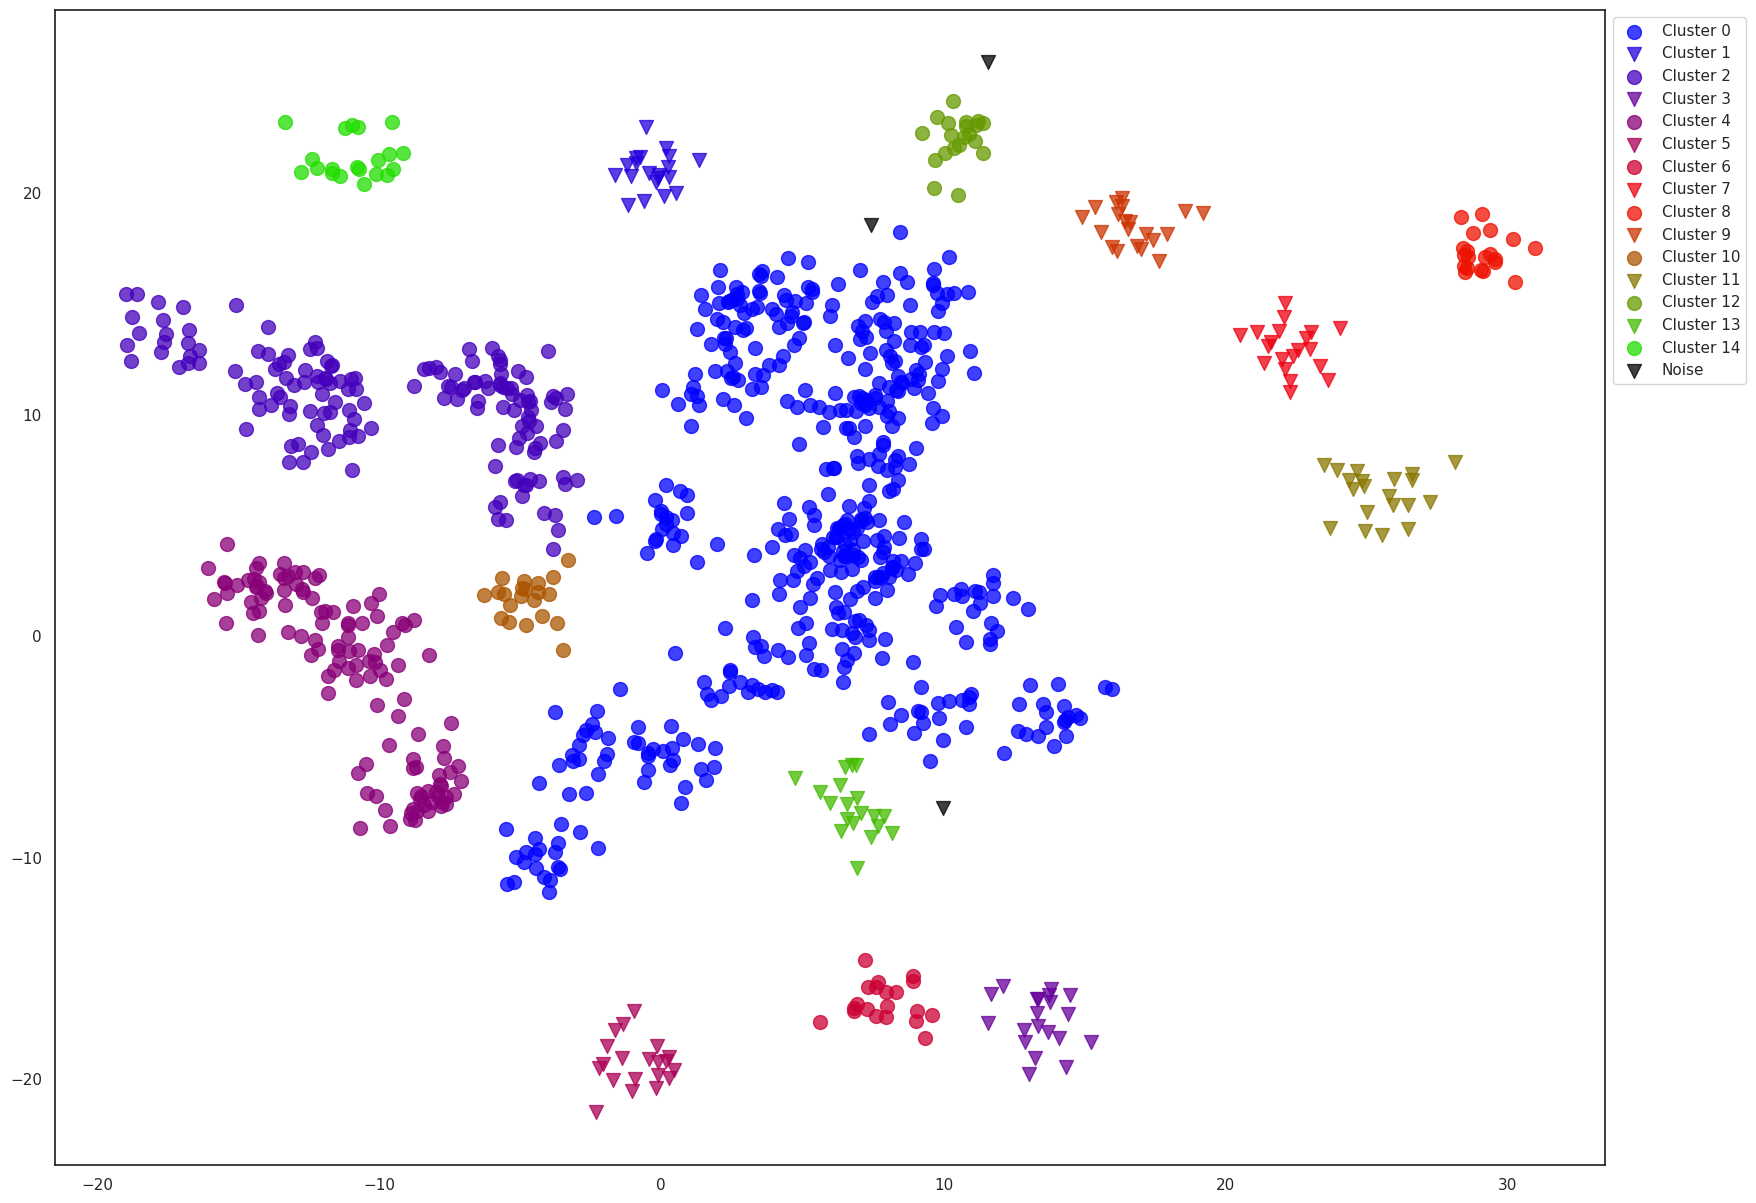

In [106]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(df1[cluster.labels_ == l, 0], df1[cluster.labels_ == l, 1], c=[cmap(l) if l >= 0 else 'Black'], marker='ov'[l%2], alpha=0.75, s=100, label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']